In [1]:
#Imports
# -*- coding: utf-8 -*-

import pandas as pd
import csv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
#Cargamos dataset
dataML_split = pd.read_csv('../../TFM/csv_bigdata/datos_filtrados.csv',sep=';',engine='python')

In [3]:
#Cambiamos columna fecha a datetime
dataML_split['fecha']= pd.to_datetime(dataML_split['fecha'],format='%Y-%m-%d')

In [4]:
dataML_split.dtypes

fecha         datetime64[ns]
dia_semana            object
hora                  object
id_tramo              object
des_tramo             object
estado                 int64
longitud             float64
latitud              float64
dtype: object

In [5]:
dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994


In [6]:
#Dividimos las columnas temporales en year,month,day,hours,minutes,seconds
dataML_split['year'] = dataML_split['fecha'].dt.year
dataML_split['month'] = dataML_split['fecha'].dt.month
dataML_split['day'] = dataML_split['fecha'].dt.day
dataML_split['hours'] = pd.to_datetime(dataML_split['hora']).dt.hour
dataML_split['minutes'] = pd.to_datetime(dataML_split['hora']).dt.minute
dataML_split['seconds'] = pd.to_datetime(dataML_split['hora']).dt.second

dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,year,month,day,hours,minutes,seconds
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,2015,1,1,0,15,1
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,2015,1,1,0,15,1
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,2015,1,1,0,15,1
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,2015,1,1,0,15,1
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,2015,1,1,0,15,1


In [9]:
dataML_split[['fecha','year','month','day','hora','hours','minutes','seconds']].head(5)

,fecha,year,month,day,hora,hours,minutes,seconds
0,2015-01-01,2015,1,1,00:15:01,0,15,1
1,2015-01-01,2015,1,1,00:15:01,0,15,1
2,2015-01-01,2015,1,1,00:15:01,0,15,1
3,2015-01-01,2015,1,1,00:15:01,0,15,1
4,2015-01-01,2015,1,1,00:15:01,0,15,1


In [10]:
#Convertimos la columna dia_semana a categórica
conditions_days = [(dataML_split['dia_semana'] == 'Lunes'),
                  (dataML_split['dia_semana'] == 'Martes'),
                  (dataML_split['dia_semana'] == 'Miércoles'),
                  (dataML_split['dia_semana'] == 'Jueves'),
                  (dataML_split['dia_semana'] == 'Viernes'),
                  (dataML_split['dia_semana'] == 'Sábado'),
                  (dataML_split['dia_semana'] == 'Domingo')]

values_days = [1,2,3,4,5,6,7]

dataML_split['dias'] = np.select(conditions_days,values_days)
dataML_split['dias'].values.astype(np.int64)

dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,year,month,day,hours,minutes,seconds,dias
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,2015,1,1,0,15,1,4
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,2015,1,1,0,15,1,4
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,2015,1,1,0,15,1,4
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,2015,1,1,0,15,1,4
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,2015,1,1,0,15,1,4


In [11]:
#Create new column id from id_tramo replacing column A -> 10 and B -> 20 to int
dataML_split['id'] = dataML_split['id_tramo'].str.replace(r'^A', '10').str.replace(r'^B', '20').astype(int)
dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,year,month,day,hours,minutes,seconds,dias,id
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,2015,1,1,0,15,1,4,10102
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,2015,1,1,0,15,1,4,10104
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,2015,1,1,0,15,1,4,10124
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,2015,1,1,0,15,1,4,10127
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,2015,1,1,0,15,1,4,10122


In [12]:
dataML_split.count()

fecha         11899959
dia_semana    11899959
hora          11899959
id_tramo      11899959
des_tramo     11899959
estado        11899959
longitud      11899959
latitud       11899959
year          11899959
month         11899959
day           11899959
hours         11899959
minutes       11899959
seconds       11899959
dias          11899959
id            11899959
dtype: int64

In [13]:
dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,year,month,day,hours,minutes,seconds,dias,id
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,2015,1,1,0,15,1,4,10102
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,2015,1,1,0,15,1,4,10104
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,2015,1,1,0,15,1,4,10124
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,2015,1,1,0,15,1,4,10127
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,2015,1,1,0,15,1,4,10122


In [14]:
dataML_split.tail(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,year,month,day,hours,minutes,seconds,dias,id
11899954,2015-12-31,Jueves,23:00:02,B86,POETA MAS Y ROS,12,-0.350830,39.471145,2015,12,31,23,0,2,4,2086
11899955,2015-12-31,Jueves,23:00:02,B87,POETA MONMENEU,21,-0.374962,39.482774,2015,12,31,23,0,2,4,2087
11899956,2015-12-31,Jueves,23:00:02,B95,RODRÍGUEZ DE CEPEDA,47,-0.352085,39.468331,2015,12,31,23,0,2,4,2095
11899957,2015-12-31,Jueves,23:00:02,B97,SAGASTA,44,-0.373892,39.469853,2015,12,31,23,0,2,4,2097
11899958,2015-12-31,Jueves,23:00:02,B98,SANTA AMALIA,38,-0.372333,39.481233,2015,12,31,23,0,2,4,2098


In [15]:
dataML_split.dtypes

fecha         datetime64[ns]
dia_semana            object
hora                  object
id_tramo              object
des_tramo             object
estado                 int64
longitud             float64
latitud              float64
year                   int64
month                  int64
day                    int64
hours                  int64
minutes                int64
seconds                int64
dias                   int64
id                     int64
dtype: object

In [16]:
#seleccionamos las columnas para aplicar en Machine Learning
dataML_splitted = dataML_split[['year','month','day','hours','minutes','seconds','dias','id','estado']]
dataML_splitted.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139
3,2015,1,1,0,15,1,4,10127,187
4,2015,1,1,0,15,1,4,10122,218


In [17]:
dataML_splitted.dtypes

year       int64
month      int64
day        int64
hours      int64
minutes    int64
seconds    int64
dias       int64
id         int64
estado     int64
dtype: object

In [18]:
dataML_splitted.count()

year       11899959
month      11899959
day        11899959
hours      11899959
minutes    11899959
seconds    11899959
dias       11899959
id         11899959
estado     11899959
dtype: int64

In [75]:
#Guardamos los datos filtrados anteriormente en un csv
ml_data = 'datos_ML_split.csv'
try:
    dataML_splitted.to_csv(ml_data,sep=';', index=False, header = True)
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
dataLiR_section = dataML_splitted.copy()
dataLiR_section.head(5)

,year,month,day,hours,minutes,seconds,dias,id,estado
0,2015,1,1,0,15,1,4,10102,37
1,2015,1,1,0,15,1,4,10104,33
2,2015,1,1,0,15,1,4,10124,139
3,2015,1,1,0,15,1,4,10127,187
4,2015,1,1,0,15,1,4,10122,218


In [78]:
dataLiR_section.count()

year       11899959
month      11899959
day        11899959
hours      11899959
minutes    11899959
seconds    11899959
dias       11899959
id         11899959
estado     11899959
dtype: int64

In [79]:
X = dataLiR_section[['year','month','day','hours','minutes','seconds','dias','id']] # Features 
y = dataLiR_section['estado'] # Target variable

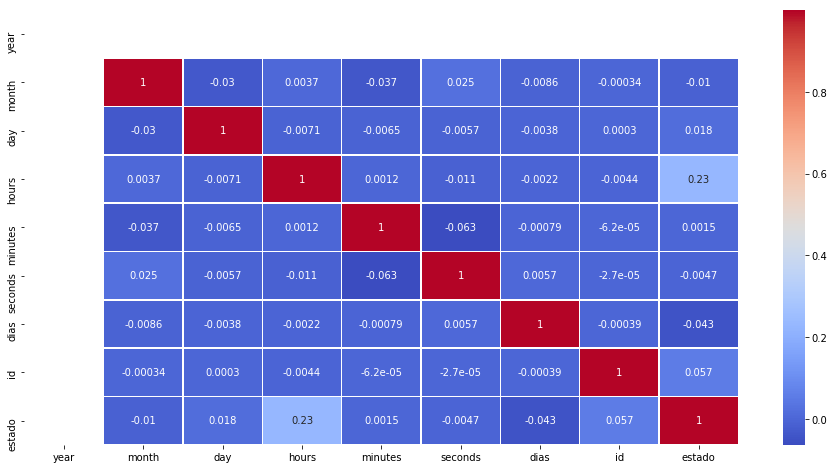

In [93]:
#Correlación
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data=dataLiR_section.astype({'estado': 'int64'}).corr(),annot=True,vmax=1.0, cmap='coolwarm',linewidths=.5, ax=ax);

In [94]:
#División Train y Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [95]:
print('Entrenamiento: ',X_train.shape[0])
print('Test:          ',X_test.shape[0])

Entrenamiento:  8924969
Test:           2974990


In [96]:
#model for Linear Regression
linear = LinearRegression()  
modelo_LiR = linear.fit(X_train, y_train) #training the algorithm

In [97]:
#Precisión del Modelo con R2 valores entre 0 y 1. Más cerca de 1 mejor se adapta el modelo
print("Accuracy: ", round(linear.score(X_test, y_test)*100,3))

Accuracy:  5.814


In [98]:
#Predictions
y_pred = modelo_LiR.predict(X_test) 

In [99]:
df_predLiR_section = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred.astype(int)})
df_predLiR_section.head(5)

,Actual,Predicción
2731141,162,532
690061,9,513
4533709,35,649
1210850,1335,640
4882885,576,740


In [100]:
#RMSE
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE:  1061.068713884281
